目的

*   降維
*   可視化
*   加入Kernel



# Import

In [33]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

display(dataset.head())


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


# Preporcessing

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Training (Kernel SVM without PCA)

In [37]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)


SVC(random_state=0)

In [38]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)

print(cm)


[[64  4]
 [ 3 29]]


## Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


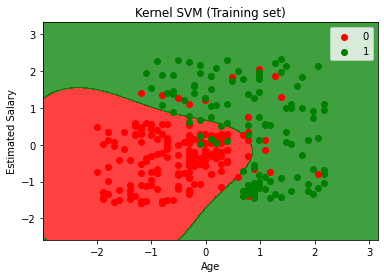

In [40]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# Training (SVM with Kernel PCA)

In [41]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')

X_train_pca = kpca.fit_transform(X_train)
X_test_pca = kpca.transform(X_test)


In [42]:
# Fitting linear SVM to the Training set
classifier_pca = SVC(kernel = 'linear', random_state = 0)
classifier_pca.fit(X_train_pca, y_train)


SVC(kernel='linear', random_state=0)

In [43]:
# Predicting the Test set results
y_pred_pca = classifier_pca.predict(X_test_pca)


In [44]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_pca)

print(cm)


[[64  4]
 [ 3 29]]


## Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


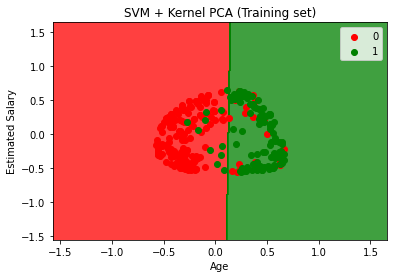

In [45]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM + Kernel PCA (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Comparison

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, preds, model_name=None):

    if model_name == None:
        print('Accuracy score: ', round(accuracy_score(y_true, preds), 2))
        print('Precision score: ', round(precision_score(y_true, preds), 2))
        print('Recall score: ', round(recall_score(y_true, preds), 2))
        print('F1 score: ', round(f1_score(y_true, preds), 2))
        print('\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , round(accuracy_score(y_true, preds), 2))
        print('Precision score ' + model_name + ' :', round(precision_score(y_true, preds), 2))
        print('Recall score ' + model_name + ' :', round(recall_score(y_true, preds), 2))
        print('F1 score ' + model_name + ' :', round(f1_score(y_true, preds), 2))
        print('\n')


In [47]:
print_metrics(y_test, y_pred_svm, 'Kernel SVM')
print_metrics(y_test, y_pred_pca, 'SVM + Kernel PCA')


Accuracy score for Kernel SVM : 0.93
Precision score Kernel SVM : 0.88
Recall score Kernel SVM : 0.91
F1 score Kernel SVM : 0.89


Accuracy score for SVM + Kernel PCA : 0.93
Precision score SVM + Kernel PCA : 0.88
Recall score SVM + Kernel PCA : 0.91
F1 score SVM + Kernel PCA : 0.89


